In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/content/listeners.csv')
df.head()

,Artist,Listeners,Daily Trend,Peak,PkListeners
0,The Weeknd,"107,592,328","-138,880",1,"113,034,886"
1,Taylor Swift,"101,003,302",889,2,"101,003,302"
2,Ed Sheeran,"76,475,126","-68,137",2,"87,934,910"
3,Dua Lipa,"76,421,916","-71,356",4,"77,778,397"
4,Bad Bunny,"76,162,057","-199,052",3,"83,950,570"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist       2500 non-null   object
 1   Listeners    2500 non-null   object
 2   Daily Trend  2500 non-null   object
 3   Peak         2500 non-null   int64 
 4   PkListeners  2500 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.8+ KB


In [5]:
df.describe()

,Peak
count,2500.0000
mean,1061.2228
std,639.7277
min,1.0000
25%,516.0000
50%,1034.5000
75%,1582.2500
max,2493.0000


In [6]:
df.dtypes

,0
Artist,object
Listeners,object
Daily Trend,object
Peak,int64
PkListeners,object


In [7]:
def convert_columns_to_int(df, columns_to_Convert):
  for col in columns_to_Convert:
    if col in df.columns:

      df[col] = df[col].str.replace(',', '').astype(int)
    else:
      print(f"Column '{col}' not found in the DataFrame.")
  return df
columns_to_convert = ['Listeners', 'PkListeners','Daily Trend']
df = convert_columns_to_int(df, columns_to_convert)

In [8]:
top10 = df.sort_values(by='Listeners', ascending=False).head(10)
top10

,Artist,Listeners,Daily Trend,Peak,PkListeners
0,The Weeknd,107592328,-138880,1,113034886
1,Taylor Swift,101003302,889,2,101003302
2,Ed Sheeran,76475126,-68137,2,87934910
3,Dua Lipa,76421916,-71356,4,77778397
4,Bad Bunny,76162057,-199052,3,83950570
5,Rihanna,75784389,116405,2,80958750
6,Drake,75371611,-67013,6,76391086
7,Justin Bieber,72623228,34540,6,75467229
8,Billie Eilish,71793820,-72877,8,72368528
9,Miley Cyrus,71277599,71089,2,84140935


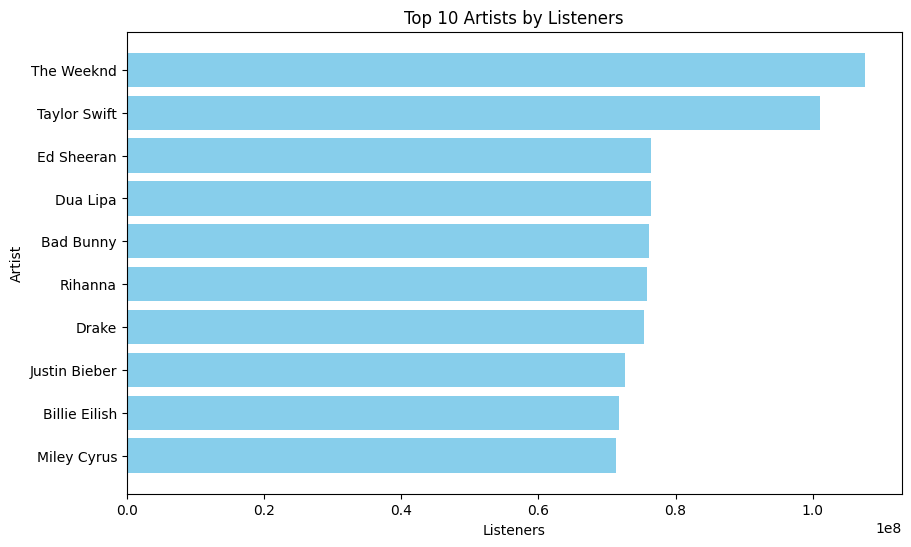

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(top10['Artist'], top10['Listeners'], color='skyblue')
plt.xlabel('Listeners')
plt.ylabel('Artist')
plt.title('Top 10 Artists by Listeners')
plt.gca().invert_yaxis()
plt.show()

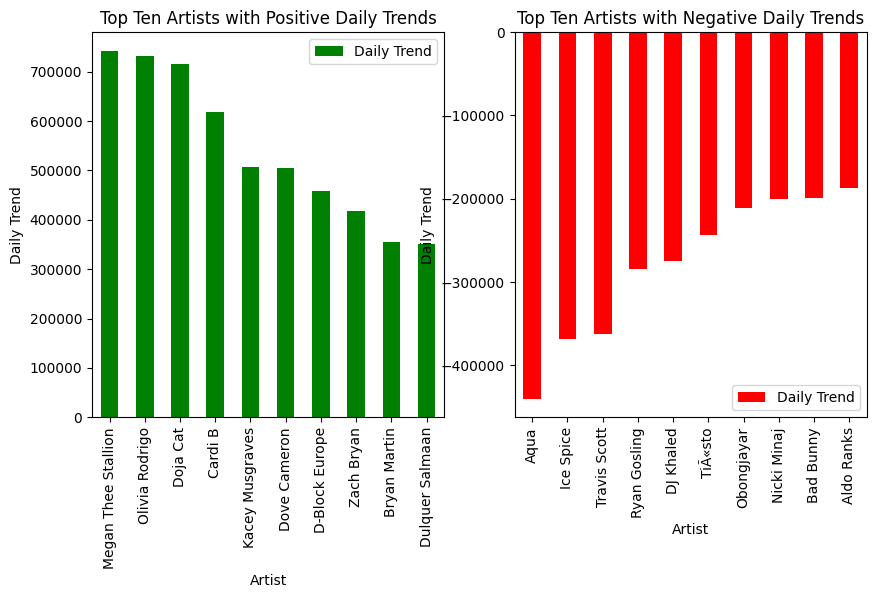

In [10]:
positive_trend = df[df['Daily Trend'] > 0]
negative_trend = df[df['Daily Trend'] < 0]
# Get the top ten artists with positive daily trends
top_positive = positive_trend.nlargest(10, 'Daily Trend')

# Get the top ten artists with negative daily trends
top_negative = negative_trend.nsmallest(10, 'Daily Trend')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the first subplot (positive trend)
top_positive.plot(kind='bar', x='Artist', y='Daily Trend', ax=ax1, color='green')
ax1.set_xlabel('Artist')
ax1.set_ylabel('Daily Trend')
ax1.set_title('Top Ten Artists with Positive Daily Trends')

# Plot the second subplot (negative trend)
top_negative.plot(kind='bar', x='Artist', y='Daily Trend', ax=ax2, color='red')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Daily Trend')
ax2.set_title('Top Ten Artists with Negative Daily Trends')
plt.show()

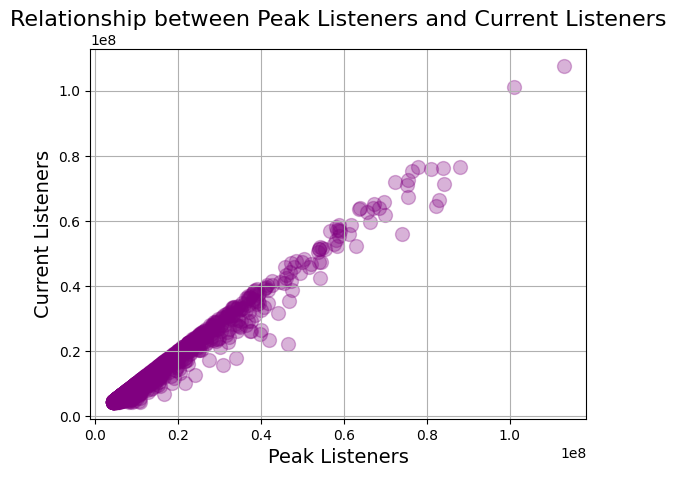

In [11]:
plt.scatter(df['PkListeners'], df['Listeners'], color='purple', alpha=0.3, s=100)

# Add axis labels and a title
plt.xlabel('Peak Listeners', fontsize=14)
plt.ylabel('Current Listeners', fontsize=14)
plt.title('Relationship between Peak Listeners and Current Listeners', fontsize=16)

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

In [12]:
corr_coef = df['PkListeners'].corr(df['Listeners'])
print('Correlation coefficient:', corr_coef)

Correlation coefficient: 0.9893795631579286


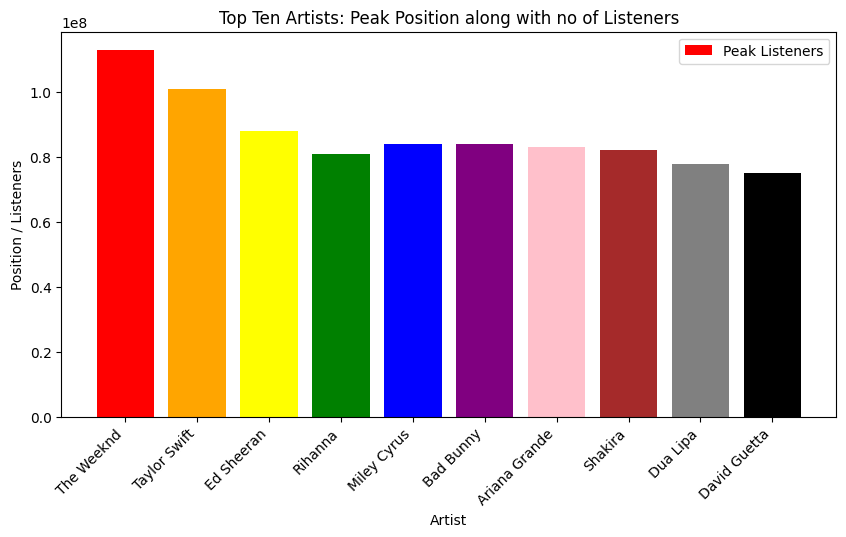

In [13]:
top_ten = df.nsmallest(10, 'Peak')

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'black']
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(top_ten['Artist'], top_ten['PkListeners'], color=colors, label='Peak Listeners')
ax.set_xlabel('Artist')
ax.set_xticklabels(top_ten['Artist'], rotation=45, ha='right')
ax.set_ylabel('Position / Listeners')
ax.set_title('Top Ten Artists: Peak Position along with no of Listeners')
ax.legend()
plt.show()